# Logistic Regression


📊 Evaluation for sequence length: 1
  Accuracy  : 0.6158
  Precision : 0.5464
  Recall    : 0.5856
  F1 Score  : 0.5653


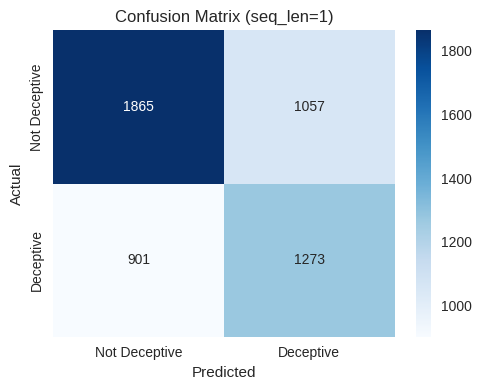

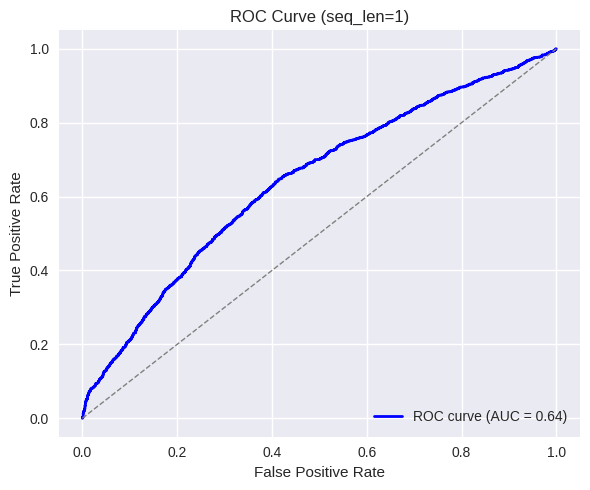


📊 Evaluation for sequence length: 2
  Accuracy  : 0.6166
  Precision : 0.5605
  Recall    : 0.5800
  F1 Score  : 0.5701


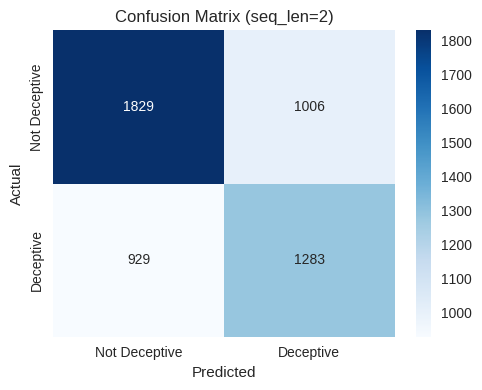

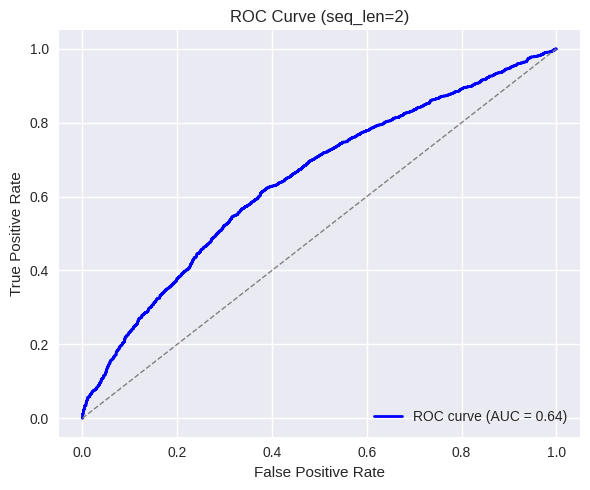


📊 Evaluation for sequence length: 3
  Accuracy  : 0.6188
  Precision : 0.5737
  Recall    : 0.5867
  F1 Score  : 0.5801


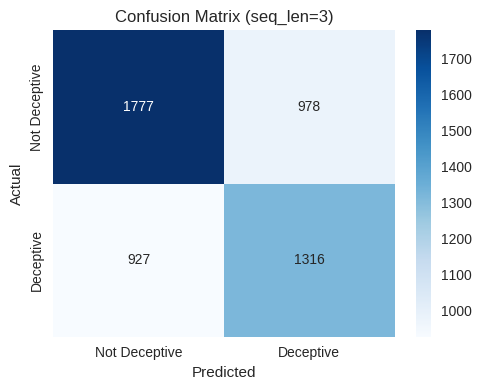

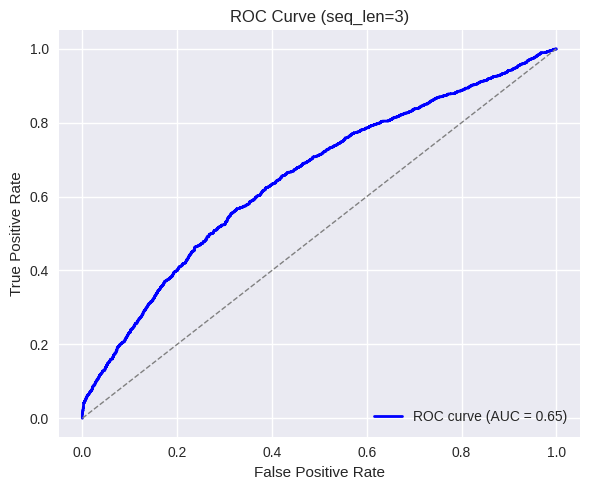


📊 Evaluation for sequence length: 4
  Accuracy  : 0.6214
  Precision : 0.5617
  Recall    : 0.5992
  F1 Score  : 0.5798


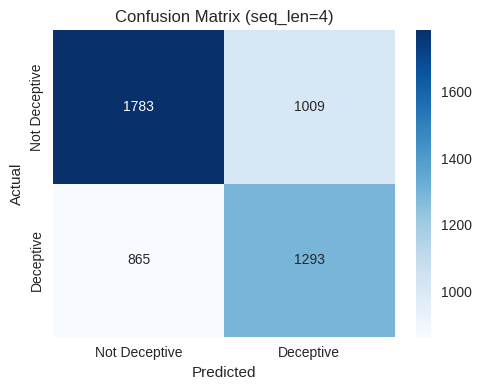

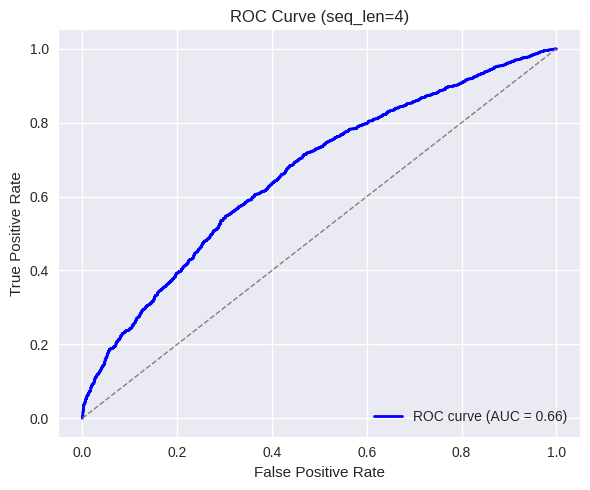


📊 Evaluation for sequence length: 5
  Accuracy  : 0.6189
  Precision : 0.5534
  Recall    : 0.5922
  F1 Score  : 0.5721


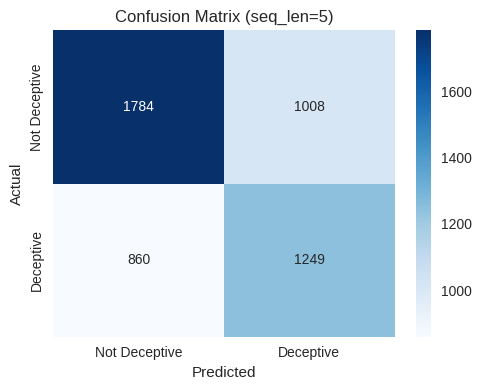

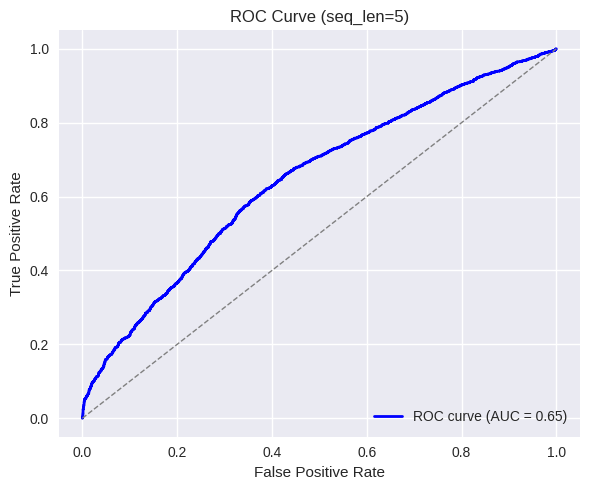

In [ ]:
import joblib
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc
)
import seaborn as sns

plt.style.use('seaborn-v0_8')

for seq_len in [1, 2, 3, 4, 5]:
    print(f"\n📊 Evaluation for sequence length: {seq_len}")

    test_path = f"ml_test_seq{seq_len}.pkl"
    model_path = f"logistic_regression_seq{seq_len}.pkl"

    if not os.path.exists(test_path) or not os.path.exists(model_path):
        print(f"❌ Missing model or test data for seq_len={seq_len}, skipping.")
        continue

    # Load model and test data
    X_test, y_test = joblib.load(test_path)
    model = joblib.load(model_path)

    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"  Accuracy  : {acc:.4f}")
    print(f"  Precision : {prec:.4f}")
    print(f"  Recall    : {rec:.4f}")
    print(f"  F1 Score  : {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Deceptive', 'Deceptive'], yticklabels=['Not Deceptive', 'Deceptive'])
    plt.title(f"Confusion Matrix (seq_len={seq_len})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.title(f"ROC Curve (seq_len={seq_len})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Random Forest


📊 Random Forest Evaluation for sequence length: 1
  Accuracy  : 0.6203
  Precision : 0.5511
  Recall    : 0.5929
  F1 Score  : 0.5712


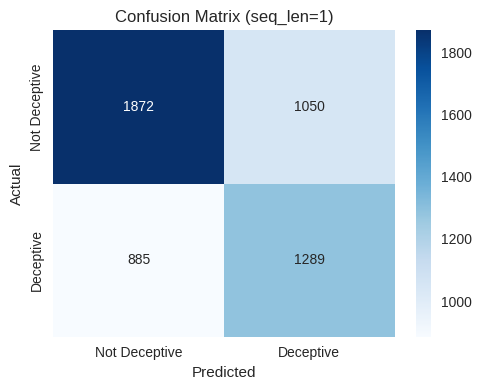

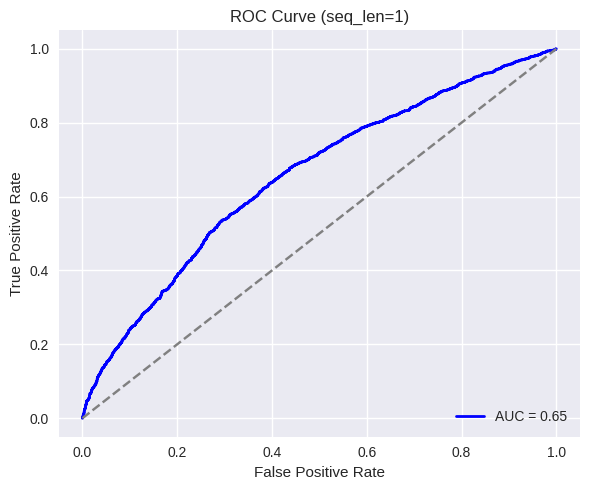


📊 Random Forest Evaluation for sequence length: 2
  Accuracy  : 0.6293
  Precision : 0.5744
  Recall    : 0.5949
  F1 Score  : 0.5845


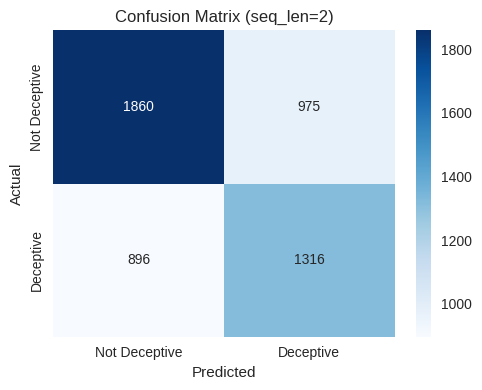

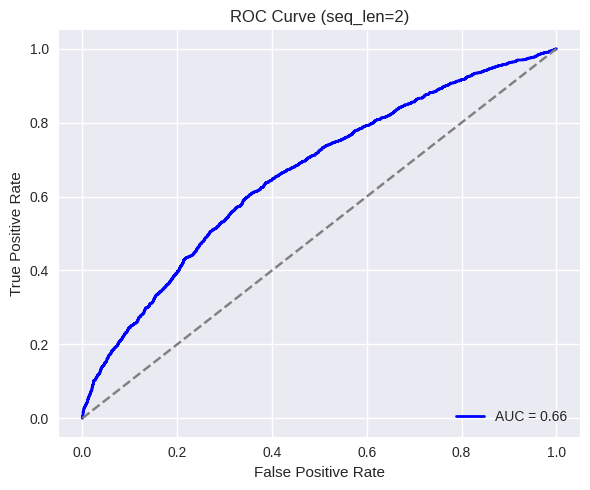


📊 Random Forest Evaluation for sequence length: 3
  Accuracy  : 0.6403
  Precision : 0.5983
  Recall    : 0.6037
  F1 Score  : 0.6010


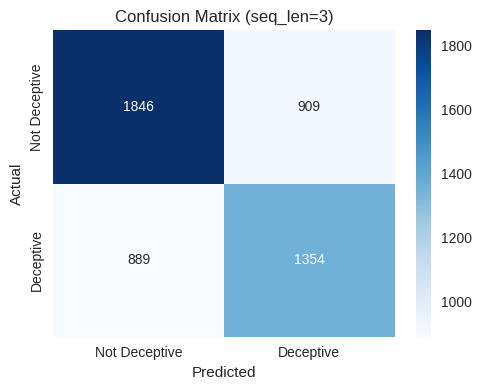

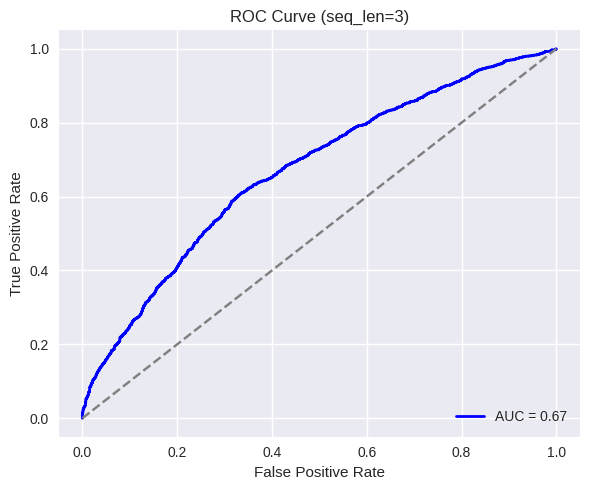


📊 Random Forest Evaluation for sequence length: 4
  Accuracy  : 0.6394
  Precision : 0.5842
  Recall    : 0.5996
  F1 Score  : 0.5918


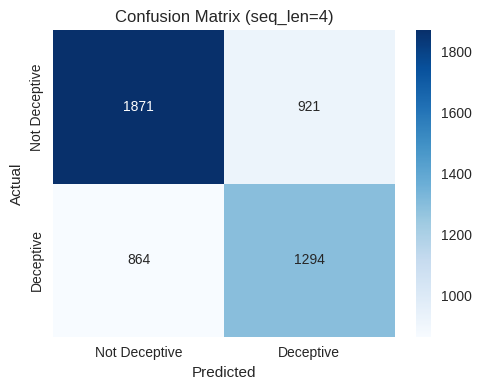

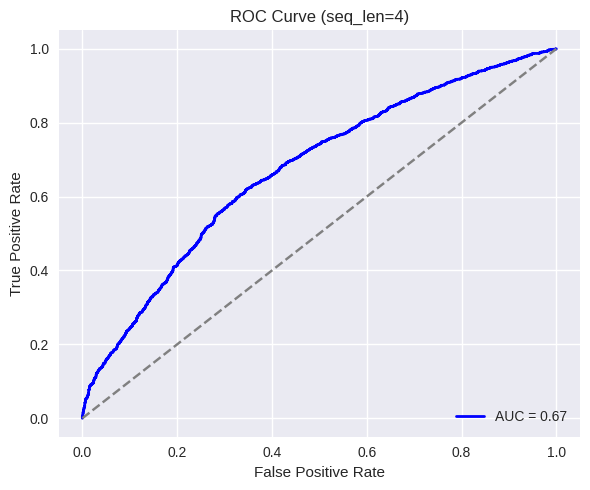


📊 Random Forest Evaluation for sequence length: 5
❌ Missing model or test data for seq_len=5, skipping.


In [7]:
import joblib
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc
)

plt.style.use('seaborn-v0_8')

for seq_len in [1, 2, 3, 4, 5]:
    print(f"\n📊 Random Forest Evaluation for sequence length: {seq_len}")

    model_path = f"random_forest_seq{seq_len}.pkl"
    test_data_path = f"ml_test_rf_seq{seq_len}.pkl"

    if not os.path.exists(model_path) or not os.path.exists(test_data_path):
        print(f"❌ Missing model or test data for seq_len={seq_len}, skipping.")
        continue

    # Load model and test data
    model = joblib.load(model_path)
    X_test, y_test = joblib.load(test_data_path)

    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"  Accuracy  : {acc:.4f}")
    print(f"  Precision : {prec:.4f}")
    print(f"  Recall    : {rec:.4f}")
    print(f"  F1 Score  : {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Deceptive', 'Deceptive'],
                yticklabels=['Not Deceptive', 'Deceptive'])
    plt.title(f"Confusion Matrix (seq_len={seq_len})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f"ROC Curve (seq_len={seq_len})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# LSTM MODEL


📊 Evaluating LSTM model for sequence length 1
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
  Accuracy : 0.8352
  Precision: 0.1600
  Recall   : 0.0049
  F1 Score : 0.0094


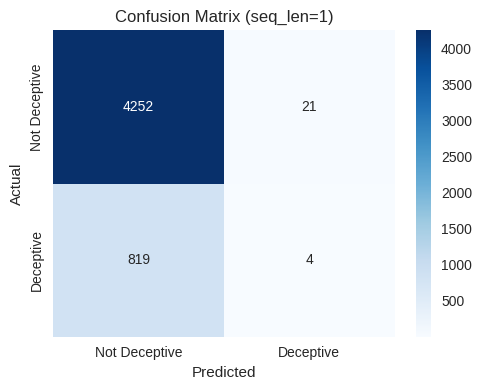

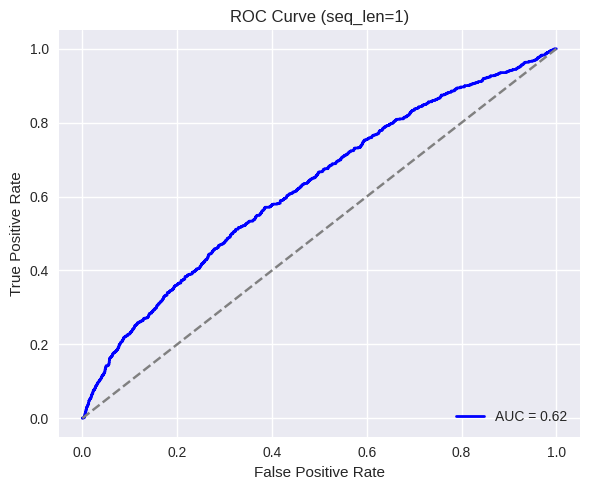


📊 Evaluating LSTM model for sequence length 2
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
  Accuracy : 0.8451
  Precision: 0.5714
  Recall   : 0.0153
  F1 Score : 0.0298


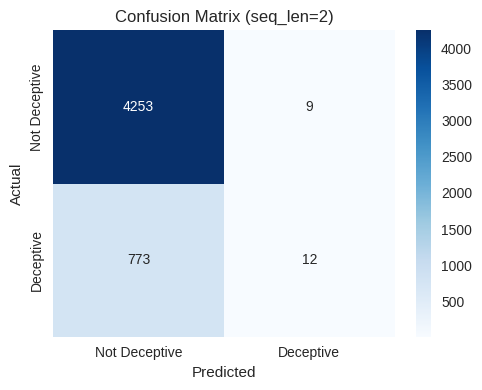

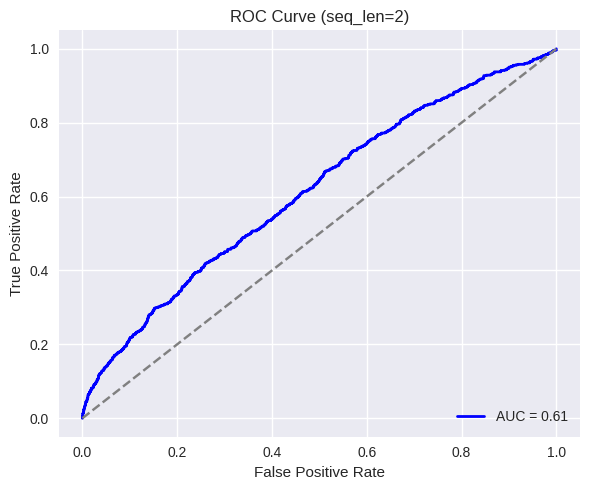


📊 Evaluating LSTM model for sequence length 3
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
  Accuracy : 0.8285
  Precision: 0.5556
  Recall   : 0.0405
  F1 Score : 0.0755


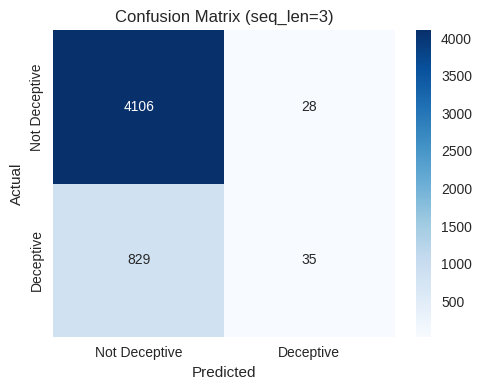

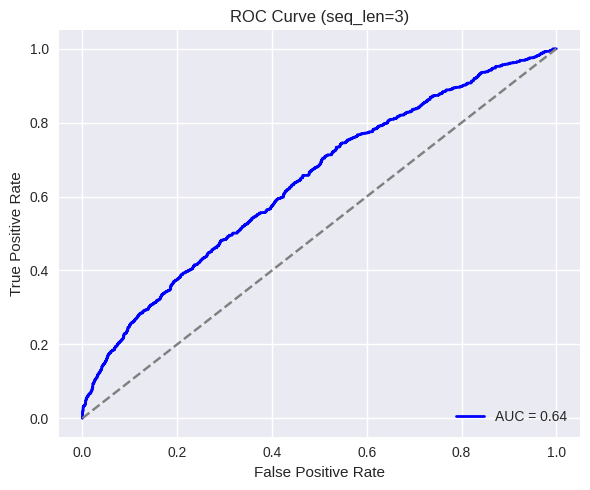


📊 Evaluating LSTM model for sequence length 4
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
  Accuracy : 0.8442
  Precision: 0.6032
  Recall   : 0.0485
  F1 Score : 0.0897


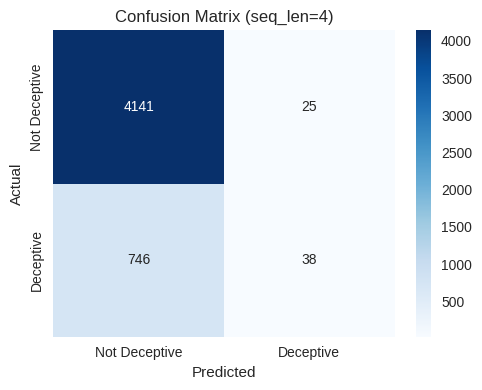

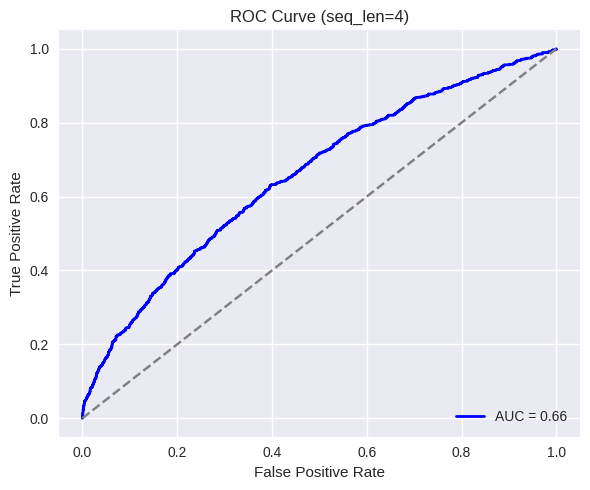


📊 Evaluating LSTM model for sequence length 5
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
  Accuracy : 0.8453
  Precision: 0.6829
  Recall   : 0.0362
  F1 Score : 0.0688


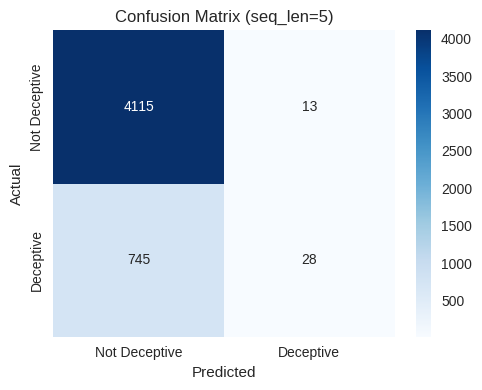

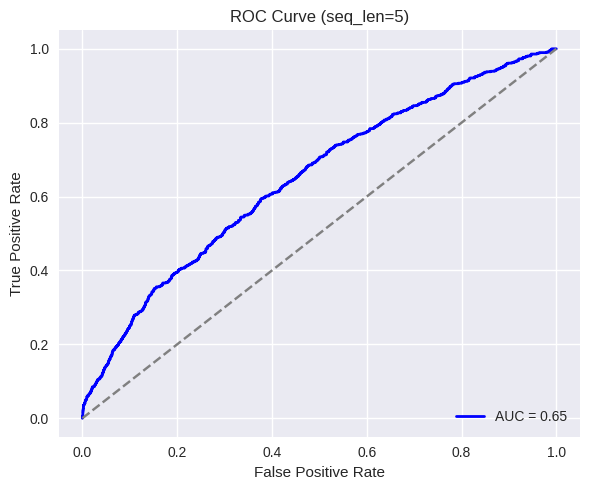

In [ ]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc
)
import seaborn as sns
import os

plt.rcParams.update({'figure.max_open_warning': 0})  # Suppress warnings for multiple plots

for seq_len in [1, 2, 3, 4, 5]:
    print(f"\n📊 Evaluating LSTM model for sequence length {seq_len}")

    model_path = f"lstm_model_seq{seq_len}.h5"
    data_path = f"ml_test_lstm_seq{seq_len}.pkl"

    if not os.path.exists(model_path) or not os.path.exists(data_path):
        print(f"❌ Model or test data missing for seq_len={seq_len}, skipping...")
        continue

    # Load model and test data
    model = load_model(model_path)
    X_test, y_test = joblib.load(data_path)

    # Predict
    y_prob = model.predict(X_test).flatten()
    y_pred = (y_prob > 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1 Score : {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Deceptive', 'Deceptive'],
                yticklabels=['Not Deceptive', 'Deceptive'])
    plt.title(f"Confusion Matrix (seq_len={seq_len})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f"ROC Curve (seq_len={seq_len})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
